In [1]:
import os
import sys
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

project_root = os.path.abspath(os.path.join(os.getcwd() , '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

load_cord = f"{project_root}/data/coordinates/processed_ger_vs_sp_coordinates.csv"

processed_cords_file = pd.read_csv(load_cord) 

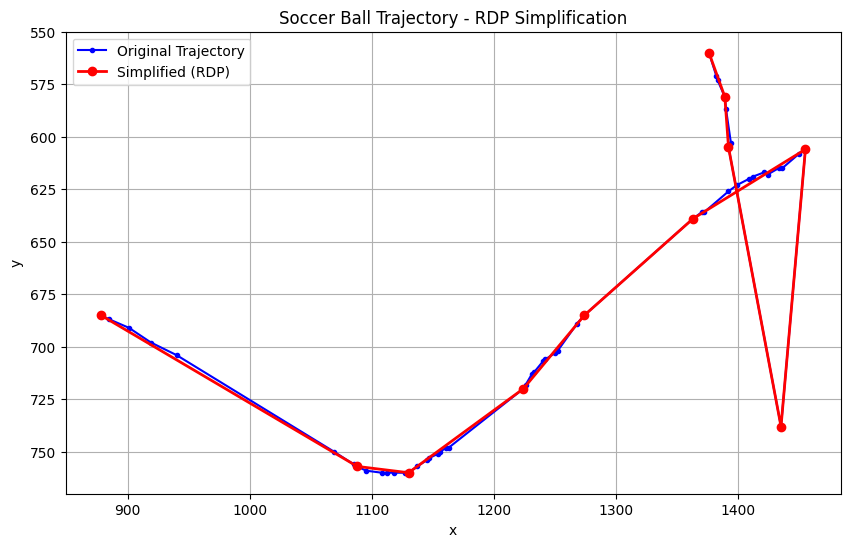

In [2]:
from rdp import rdp

points = processed_cords_file[['x', 'y']].values
frames = processed_cords_file['frame'].values

simplified_rdp = rdp(points, epsilon=3)

# Plot the original and simplified trajectory
plt.figure(figsize=(10, 6))
plt.plot(points[:, 0], points[:, 1], 'b.-', label='Original Trajectory')
plt.plot(*zip(*simplified_rdp), 'ro-', label='Simplified (RDP)', linewidth=2)
plt.legend()
plt.title('Soccer Ball Trajectory - RDP Simplification')

# IMPORTAT: spiegelt auf X-Achse
plt.gca().invert_yaxis()

plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [3]:
# Find corresponding frame numbers by matching each simplified point to the original
simplified_indices = [np.where((points == pt).all(axis=1))[0][0] for pt in simplified_rdp]
simplified_frames = frames[simplified_indices]

simplified_array = np.column_stack((simplified_frames, simplified_rdp))

simplified_array = simplified_array[simplified_array[:, 0].argsort()]

In [4]:
# Save coordinates to CSV file
if len(simplified_array) > 0:
    coord_path = f"{project_root}/data/coordinates/rdp_filtered_ger_vs_sp_coordinates.csv"
    np.savetxt(coord_path, simplified_array, delimiter=',', 
                header='frame,x,y', comments='', fmt='%d')
    print(f"Ball coordinates saved to {coord_path}")

Ball coordinates saved to /home/denis/Projects/var-ai/data/coordinates/rdp_filtered_ger_vs_sp_coordinates.csv


In [5]:
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

points = processed_cords_file[['x', 'y']].values

# Calculate angles between consecutive vectors
def angle_between(v1, v2):
    v1_u = v1 / np.linalg.norm(v1)
    v2_u = v2 / np.linalg.norm(v2)
    dot = np.dot(v1_u, v2_u)
    return np.arccos(np.clip(dot, -1.0, 1.0))  # radians

angles = []
for i in range(1, len(points) - 1):
    v1 = points[i] - points[i - 1]
    v2 = points[i + 1] - points[i]
    angle = angle_between(v1, v2)
    angles.append(angle)

# Use scipy to find peaks in angle values (sharpest turns)
peaks, _ = find_peaks(angles, height=0.1)  # adjust height threshold as needed

# Align peaks with original point indices
peak_indices = [i + 1 for i in peaks]  # because angle was computed from i-1 to i+1

# Plot full trajectory
plt.figure(figsize=(10, 6))
plt.plot(points[:, 0], points[:, 1], 'b.-', label='Trajectory')
plt.scatter(points[peak_indices, 0], points[peak_indices, 1], color='red', label='Direction Changes (Peaks)', zorder=5)
plt.gca().invert_yaxis()
plt.title('Trajectory with Direction Change Peaks (scipy)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()
"""

"\nimport pandas as pd\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom scipy.signal import find_peaks\n\npoints = processed_cords_file[['x', 'y']].values\n\n# Calculate angles between consecutive vectors\ndef angle_between(v1, v2):\n    v1_u = v1 / np.linalg.norm(v1)\n    v2_u = v2 / np.linalg.norm(v2)\n    dot = np.dot(v1_u, v2_u)\n    return np.arccos(np.clip(dot, -1.0, 1.0))  # radians\n\nangles = []\nfor i in range(1, len(points) - 1):\n    v1 = points[i] - points[i - 1]\n    v2 = points[i + 1] - points[i]\n    angle = angle_between(v1, v2)\n    angles.append(angle)\n\n# Use scipy to find peaks in angle values (sharpest turns)\npeaks, _ = find_peaks(angles, height=0.1)  # adjust height threshold as needed\n\n# Align peaks with original point indices\npeak_indices = [i + 1 for i in peaks]  # because angle was computed from i-1 to i+1\n\n# Plot full trajectory\nplt.figure(figsize=(10, 6))\nplt.plot(points[:, 0], points[:, 1], 'b.-', label='Trajectory')\nplt.scatter(points[